# Linear Regression

In this notebook, we will be predicting price of a house based on various parameters. We will use linear regression, which is:


*   a relation between feautures X and target Y.
*   a line which has closet distance to all possible outcomes from observation.


Dataset used here is 'USA_Housing dataset'. Since house price is a continues variable, this is a regression problem.

The data contains the following columns:


*   Avg. Area Income:  Average Income of residents of the city where house is located.
*   Avg. Area House Age:  Average Age of Houses in the same city.
*   Avg. Area Number of Rooms:  Average Number of Rooms for Houses in same city.
*   Avg. Area Number of Bedrooms:  Average Number of Bedrooms for Houses in same city.
*   Area Population: Population of city where the house is located.
*   Price:  Price at which the house is sold.
*   Address:  Address of the house.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')
data = USAhousing.copy()
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


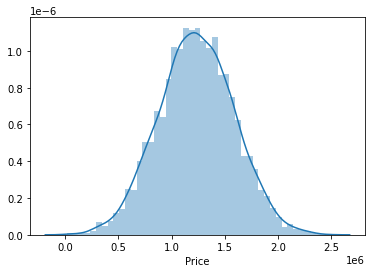

In [5]:
sns.distplot(data['Price'])

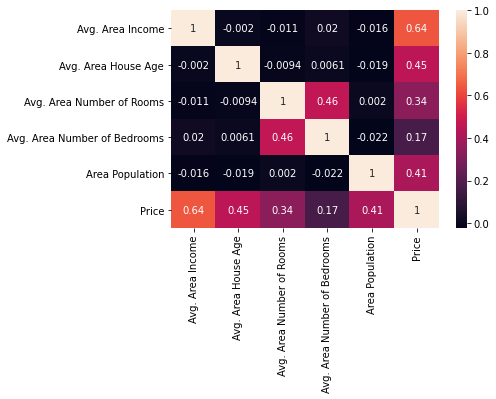

In [6]:
corr = data.corr()
sns.heatmap(corr, annot=True)

## Regression Analysis

In [7]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

#### Features and Targets

In [8]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

#### Splitting data into Train and Test data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [11]:
y_pred = regressor.predict(X_test)

In [12]:
print(f'Incercept Value: {regressor.intercept_}')

Incercept Value: -2641339.6683442937


In [13]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.653321
Avg. Area House Age,165146.945516
Avg. Area Number of Rooms,119540.663353
Avg. Area Number of Bedrooms,3613.215869
Area Population,15.222282


In [14]:
from sklearn import metrics

print(f'MAE: {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')

MAE: 82293.98924778088
MSE: 10327215823.322634
RMSE: 101622.90993335427


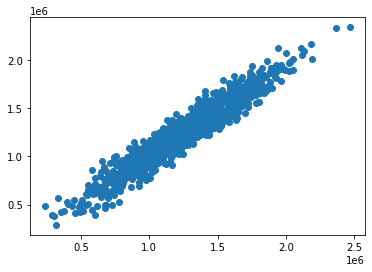

In [15]:
plt.scatter(y_test, y_pred)

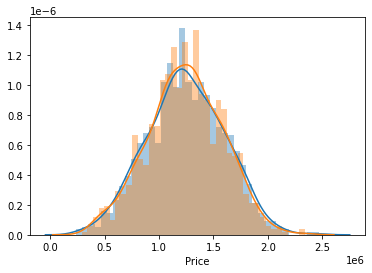

In [16]:
sns.distplot((y_test), bins=40)
sns.distplot((y_pred), bins=40)

Looking at the above graph,
 we can say that predicted values fairly superimpose with test values(targets) which proves that our model indeed fits data. 